In [140]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import pandas as pd


In [132]:
data = pd.read_csv("/content/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


from matplotlib import pyplot as plt
_df_140['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_141['RestingBP'].plot(kind='hist', bins=20, title='RestingBP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_142['Cholesterol'].plot(kind='hist', bins=20, title='Cholesterol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_143['MaxHR'].plot(kind='hist', bins=20, title='MaxHR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_144.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_145.groupby('ChestPainType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_146.groupby('RestingECG').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_147.groupby('ExerciseAngina').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_148.plot(kind='scatter', x='Age', y='RestingBP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_149.plot(kind='scatter', x='RestingBP', y='Cholesterol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_150.plot(kind='scatter', x='Cholesterol', y='MaxHR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_151.plot(kind='scatter', x='MaxHR', y='Oldpeak', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FastingBS']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_152.sort_values('FastingBS', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FastingBS')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FastingBS']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_153.sort_values('FastingBS', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ChestPainType')):
  _plot_series(series, series_name, i)
  fig.legend(title='ChestPainType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FastingBS')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FastingBS']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_154.sort_values('FastingBS', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('RestingECG')):
  _plot_series(series, series_name, i)
  fig.legend(title='RestingECG', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FastingBS')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FastingBS']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_155.sort_values('FastingBS', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ExerciseAngina')):
  _plot_series(series, series_name, i)
  fig.legend(title='ExerciseAngina', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FastingBS')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
_df_156['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_157['RestingBP'].plot(kind='line', figsize=(8, 4), title='RestingBP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_158['Cholesterol'].plot(kind='line', figsize=(8, 4), title='Cholesterol')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_159['MaxHR'].plot(kind='line', figsize=(8, 4), title='MaxHR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ChestPainType'].value_counts()
    for x_label, grp in _df_160.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('ChestPainType')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['RestingECG'].value_counts()
    for x_label, grp in _df_161.groupby('ChestPainType')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ChestPainType')
_ = plt.ylabel('RestingECG')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ExerciseAngina'].value_counts()
    for x_label, grp in _df_162.groupby('RestingECG')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('RestingECG')
_ = plt.ylabel('ExerciseAngina')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ST_Slope'].value_counts()
    for x_label, grp in _df_163.groupby('ExerciseAngina')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ExerciseAngina')
_ = plt.ylabel('ST_Slope')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_164['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_164, x='Age', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_165['ChestPainType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_165, x='Age', y='ChestPainType', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_166['RestingECG'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_166, x='Age', y='RestingECG', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_167['ExerciseAngina'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_167, x='Age', y='ExerciseAngina', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [133]:
from sklearn.datasets import make_circles

In [134]:
x = data[['RestingBP']]
y = data['Cholesterol']

In [135]:
x,y = make_circles(n_samples=40,factor=.2,noise=.05,random_state=42)
outer = y == 0
inner = y == 1

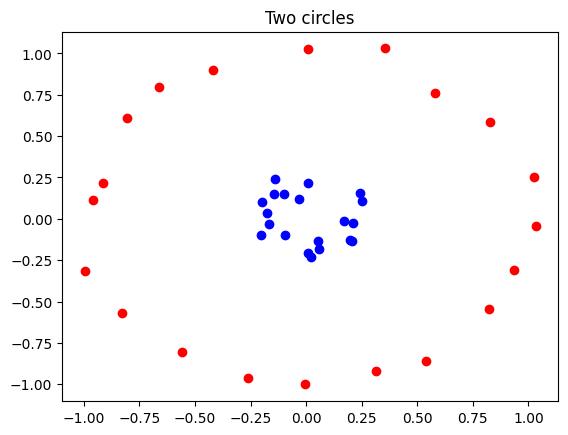

In [136]:
plt.title("Two circles")
plt.plot(x[outer,0],x[outer,1],"ro")
plt.plot(x[inner,0],x[inner,1],"bo")

In [142]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
n_hidden=50
n_epochs=1000
learning_rate=1
weights_hidden=np.random.normal(0.0,size=(x_train.shape[1],n_hidden))
weights_output=np.random.normal(0.0,size=(n_hidden))
hist_loss=[]
hist_accuracy=[]
print(weights_hidden)
print(weights_output)

[[ 1.90712822  0.86869885  1.21392798  0.04982007  0.58915813 -1.47448382
   1.47332968 -1.43274899  0.47807991  1.77336843 -0.4013564  -1.10825768
   0.48756745 -0.79788027 -1.0508908   1.36303802 -1.26348474  1.59858104
  -0.9825128   0.10036747  0.05412917 -0.25805945  0.51884569  2.89032571
  -1.90315622 -0.48976503 -1.25819474  1.21585369 -0.49000661 -1.40468338
   0.21310681 -0.55199225 -1.8873491   0.02783     2.15123025  0.15236713
   0.09564999  0.72492243  0.1285723   0.07417593  0.67786132 -1.77138657
  -0.71513668  1.16658386  1.27081426  0.61451917 -1.58020509 -0.35028064
  -1.14572644  0.24439568]
 [-0.55791704 -0.49139848  0.45200882 -0.57914961 -2.22766095  0.34984103
   0.39193511 -0.65332889 -0.4558023  -2.04550452  1.53197064  1.51717027
  -0.86916308 -1.82411594  1.20151206  1.52118644  1.5999309  -0.49426779
  -0.44605265 -0.3125577  -0.23470562  1.42010814 -1.82813109  0.64092938
  -0.54613372 -0.33246709  2.08990764  0.21711324  0.36213234 -0.45628796
   0.842732